### **Faradisha Aldina Putri - 2141720159 - TI3I**

## **LAB ASSIGNMENT**

### **Tasks**
- Create a K-Means model with the following conditions:
    1. Use the 'Mall_Customers.csv' data.
    2. Determine the appropriate features for clustering (at least 2).
    3. Create a K-Means model considering the best number of clusters.
    4. Reimplement the model by using SOM.

---

- 1. **Use the 'Mall_Customers.csv' data.**

In [1]:
# Data Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('../data/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [3]:
df.corr()

C:\Users\faral\AppData\Local\Temp\ipykernel_11816\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


Encoding Gender

In [4]:
from sklearn.calibration import LabelEncoder

labelencoder=LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


-   2. **Determine the appropriate features for clustering (at least 2).**

c:\Users\faral\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\faral\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\faral\AppData\Local\Temp\ipykernel_11816\693998699.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, s=60, palette='Set1')


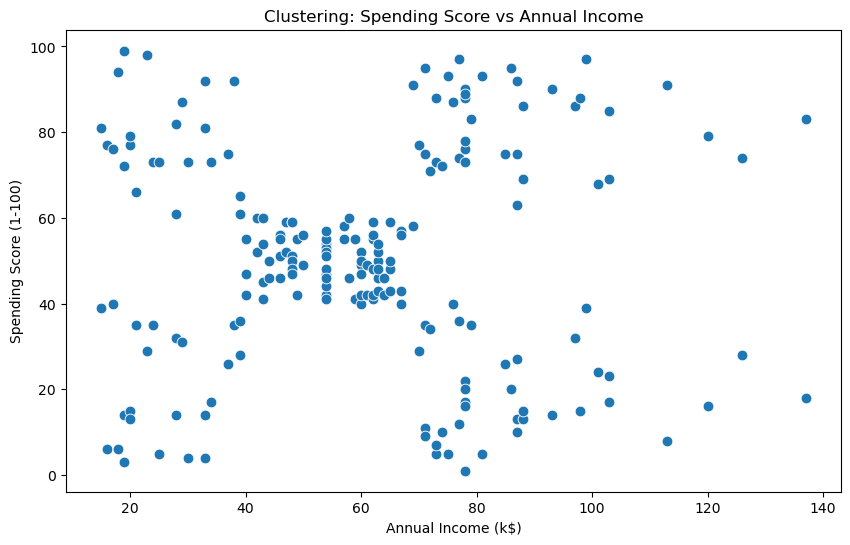

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select two features for analysis
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Determine the number of clusters (for example, 5 clusters)
num_clusters = 5

# Perform clustering using KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Added 'Cluster' column to DataFrame
df['Cluster'] = kmeans.labels_

# Displays a scatter plot with color separation based on clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, s=60, palette='Set1')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering: Spending Score vs Annual Income')
plt.show()

- 3. **Create a K-Means model considering the best number of clusters.**

In [14]:
print(f'SSE: {kmeans.inertia_}')

SSE: 44448.4554479337


c:\Users\faral\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\faral\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\faral\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\faral\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

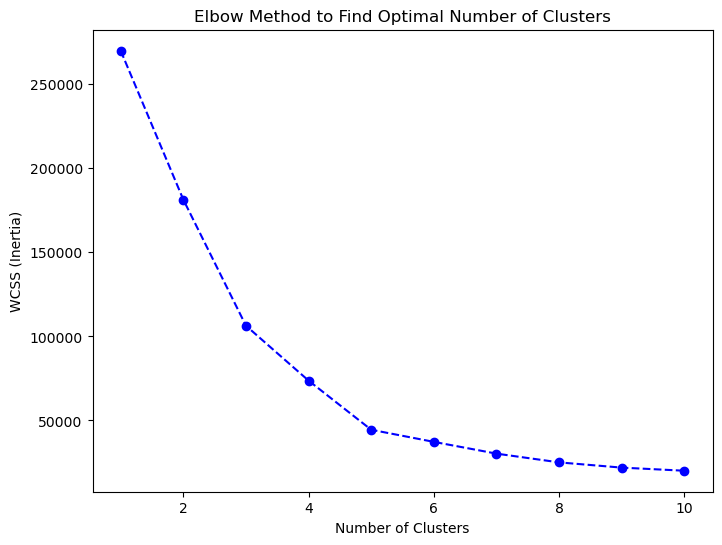

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select two features for analysis
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Determine the best number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Displays elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method to Find Optimal Number of Clusters')
plt.show()

Check the value for each K

In [11]:
for idx, inertia_val in enumerate(inertia, start=1):
    print(f'k={idx}; SSE={inertia_val}')

k=1; SSE=269981.28
k=2; SSE=181363.59595959593
k=3; SSE=106348.37306211122
k=4; SSE=73679.78903948836
k=5; SSE=44448.4554479337
k=6; SSE=37233.814510710006
k=7; SSE=30241.34361793658
k=8; SSE=25036.417604033988
k=9; SSE=21916.79478984373
k=10; SSE=20072.070939404002


In [8]:
from sklearn.cluster import KMeans

# Select two features for analysis
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Initialize K-Means with the desired number of clusters
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Perform clustering and get cluster labels
df["label"] = kmeans.fit_predict(X)

# Output DataFrame with label-cluster
print(df.head())

c:\Users\faral\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\faral\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1   19                  15                      39   
1           2       1   21                  15                      81   
2           3       0   20                  16                       6   
3           4       0   23                  16                      77   
4           5       0   31                  17                      40   

   Cluster  label  
0        4      4  
1        2      2  
2        4      4  
3        2      2  
4        4      4  


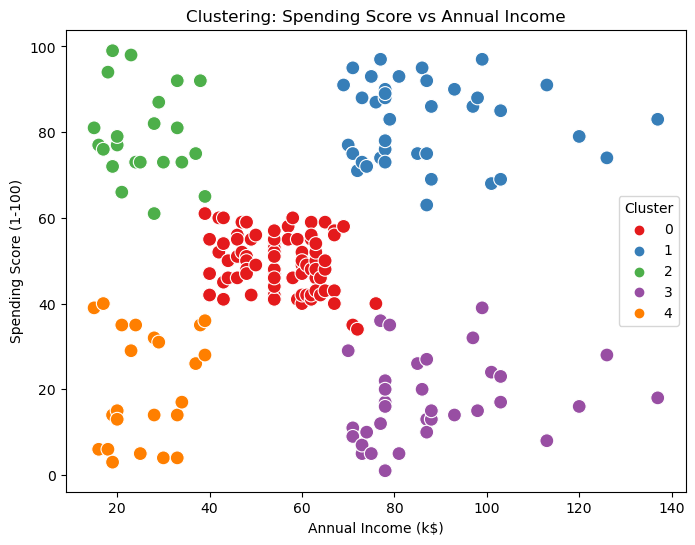

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot from cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1', s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clustering: Spending Score vs Annual Income')
plt.show()

From the image above, the Mall_Customers dataset has formed 5 different clusters. Blue clusters indicate customers who have the lowest income and expenditure scores. Meanwhile, orange is the customer with the highest income and expenditure scores

- 4. **Reimplement the model by using SOM.**

In [12]:
# import library 
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

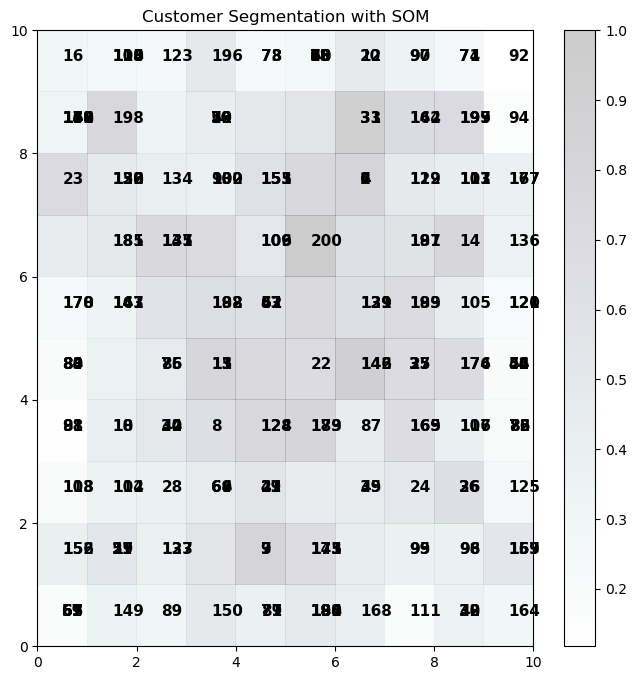

In [13]:
#implement SOM

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(X)

# Initialize SOM Model
map_size = (10, 10)
som = MiniSom(map_size[0], map_size[1], normalized_data.shape[1], sigma=0.5, learning_rate=0.5)

# Initialize random weights
som.random_weights_init(normalized_data)

# Train SOM
num_epochs = 100
som.train_random(normalized_data, num_epochs)

# SOM Visualization
plt.figure(figsize=(8, 8))
for i, x in enumerate(normalized_data):
    w = som.winner(x)  # Winning neuron for sample x
    plt.text(w[0] + 0.5, w[1] + 0.5, str(i + 1), color='k', fontdict={'weight': 'bold', 'size': 11})
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=0.2)
plt.colorbar()
plt.title('Customer Segmentation with SOM')
plt.show()